In [9]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings("ignore")

data_dir = data_dir = "E:\\He_is_enough03 X UniqoXTech X Dreams\\Click_here\\Artificial Intelligence\\ML - AGRIQO\\Data set\\current_dataset.csv"

data = pd.read_csv(data_dir)


#outliers removal
cols = ['Rainfall (mm)','Mean Temp. (*C)', 'RHmean (%)', 'SShr (hrs)', 'WD (deg)', 'WS (Km/hr)']

for col in cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

data.info  

<bound method DataFrame.info of     Agricultural Zone   Month  Week  Rainfall (mm)  Mean Temp. (*C)  \
1               Bogra  August     1           63.3             29.3   
4               Dhaka    July     2           73.5             29.1   
5            Dinajpur    June     4           96.0             29.2   
6            Faridpur    July     4           84.5             29.0   
7              Khulna  August     3           76.5             29.1   
..                ...     ...   ...            ...              ...   
368            Khulna     May     1           17.5             30.1   
369           Jashore    June     1           49.5             30.7   
370          Faridpur   April     1           18.0             28.5   
371          Dinajpur   April     1            8.0             26.7   
372             Dhaka     May     1           21.0             29.0   

     RHmean (%)  SShr (hrs)  WD (deg)  WS (Km/hr) label  
1          83.6        35.0     137.0         6.3  Aman  

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])
data.drop(columns=['label'], axis=1, inplace=True)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

data = pd.get_dummies(data, columns=['Agricultural Zone'], prefix='Zone')
data = pd.get_dummies(data, columns=['Month'], prefix='Month')
data = pd.get_dummies(data,columns=['Week'], prefix='Week')
data.head()

{'Aman': 0, 'Aush': 1, 'Badam Kharip - 1': 2, 'Badam robi': 3, 'Banana': 4, 'Boro': 5, 'Brinjal(Khorip)': 6, 'Brinjal(Robi)': 7, 'Corn(Robi)': 8, 'Guava': 9, 'Kharif cucumber': 10, 'Khorip Mug 1': 11, 'Mango': 12, 'Potato': 13, 'Rabi Cucumber': 14, 'Red Lentil': 15, 'Robi Mug': 16, 'Soybean': 17, 'Sugarcane': 18, 'Tomato': 19, 'Wheat': 20, 'corn khorip-1': 21, 'garlic': 22, 'indian jujube': 23, 'jackfruit': 24, 'jute': 25, 'khorip green chilli': 26, 'khorip lau (grourd)': 27, 'khorip onion': 28, 'khorip pointed grourd': 29, 'khorip pumpkin Cucurbita': 30, 'licchi': 31, 'masterd seed': 32, 'papaya': 33, 'pineapple': 34, 'robi green chilli ': 35, 'robi lau (gourd)': 36, 'robi onion': 37, 'robi pointed gourd': 38, 'robi pumpkin Cucurbita': 39}


,Rainfall (mm),Mean Temp. (*C),RHmean (%),SShr (hrs),WD (deg),WS (Km/hr),label_encoded,Zone_Barisal,Zone_Bogra,Zone_Chittagonj,...,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Week_1,Week_2,Week_3,Week_4
1,63.3,29.3,83.6,35.0,137.0,6.3,0,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,73.5,29.1,83.0,32.0,159.0,5.9,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,96.0,29.2,83.0,31.0,121.0,3.7,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
6,84.5,29.0,85.5,32.0,180.0,5.6,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,76.5,29.1,85.6,31.0,170.0,6.5,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [11]:
y = data['label_encoded']
class_counts = y.value_counts()
print(class_counts)

rare_class = class_counts[class_counts==1].index[0]
rare_row = data[data['label_encoded']==rare_class]
data= pd.concat([data,rare_row],ignore_index=True)
print(data.shape)

label_encoded
8     14
5     14
1     13
32    13
18    13
13    13
15    12
35    11
20    11
25    11
7     10
30     9
24     9
16     9
22     9
36     9
6      9
26     8
19     8
39     8
29     8
37     8
3      8
9      8
14     8
31     7
33     7
4      7
21     7
0      7
27     7
38     6
12     5
2      5
11     5
34     5
10     5
17     3
23     2
28     1
Name: count, dtype: int64
(333, 37)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = data.drop(['label_encoded'],axis=1)
y = data['label_encoded']

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#applying smote
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42,k_neighbors=1)
X, y = smote.fit_resample(X, y)
print(X.shape)


(560, 36)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn import metrics

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'HistGradientBoosting': HistGradientBoostingClassifier(),
    # 'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',objective='multi:softmax'),
    # 'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'CatBoost': CatBoostClassifier(),
    'LightGBM': lgb.LGBMClassifier()
}

In [16]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average = 'weighted')
    recall = recall_score(y_test, y_pred,average = 'weighted')
    f1 = f1_score(y_test, y_pred,average = 'weighted')
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='none', cmap='Blues')
    plt.colorbar(label="Count")

    num_classes = len(np.unique(y_test))
    ticks = np.linspace(0, num_classes - 1, num_classes)

    plt.xticks(ticks, labels=np.unique(y_test), fontsize=6, rotation=90)
    plt.yticks(ticks, labels=np.unique(y_test), fontsize=6)
    plt.xlabel("Predicted Labels", fontsize=10)
    plt.ylabel("True Labels", fontsize=10)
    plt.title("Confusion Matrix", fontsize=12)

    plt.grid(False)
    plt.tight_layout()
    plt.show()

    return accuracy, precision, recall, f1

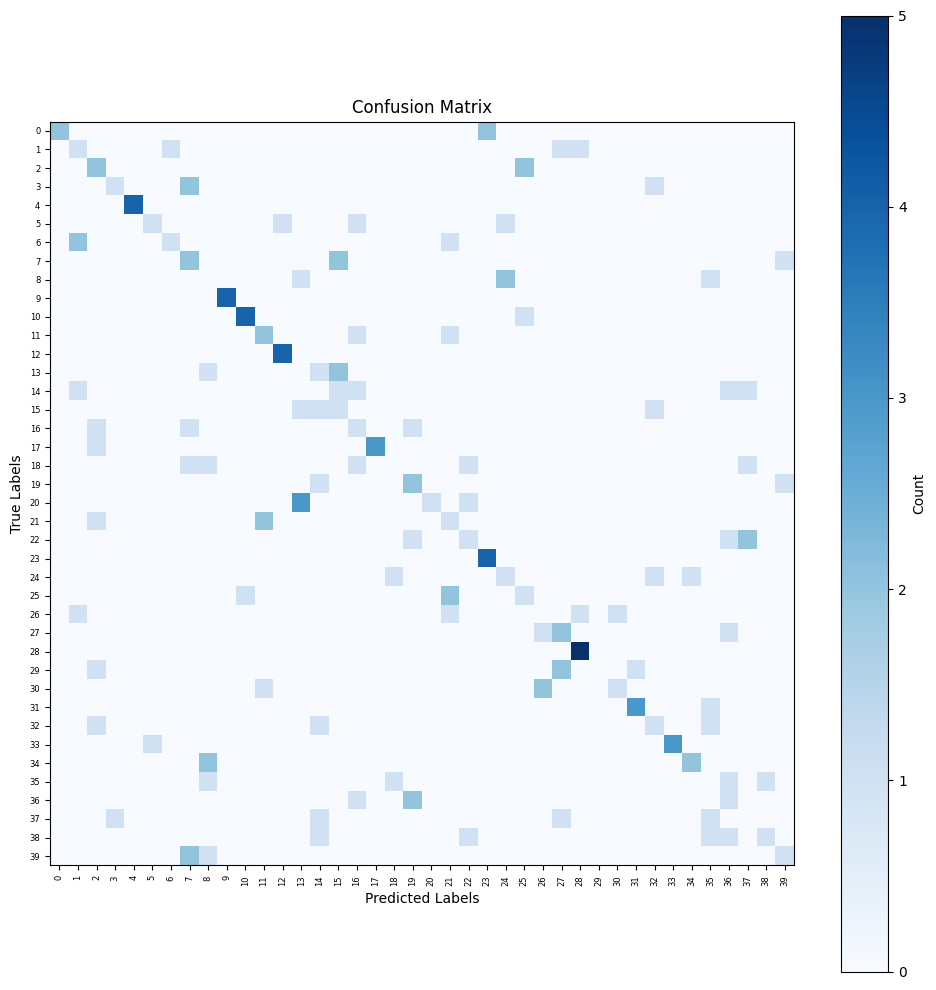

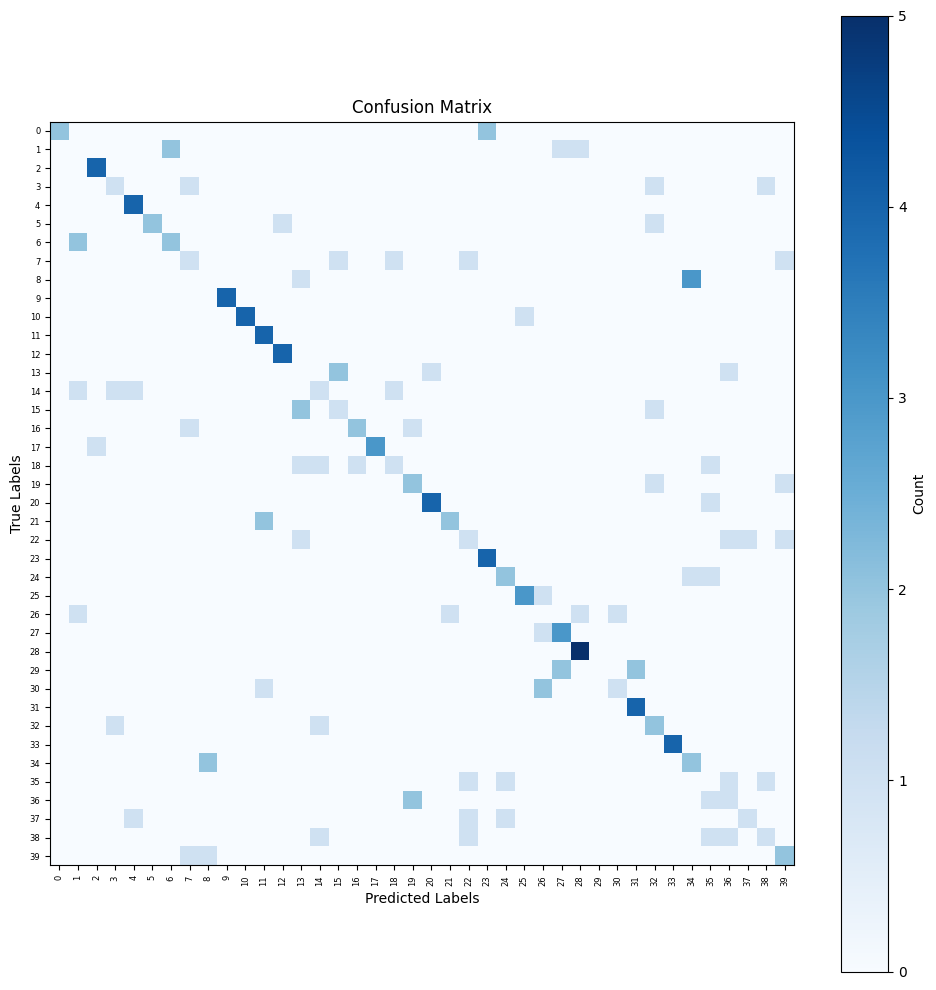

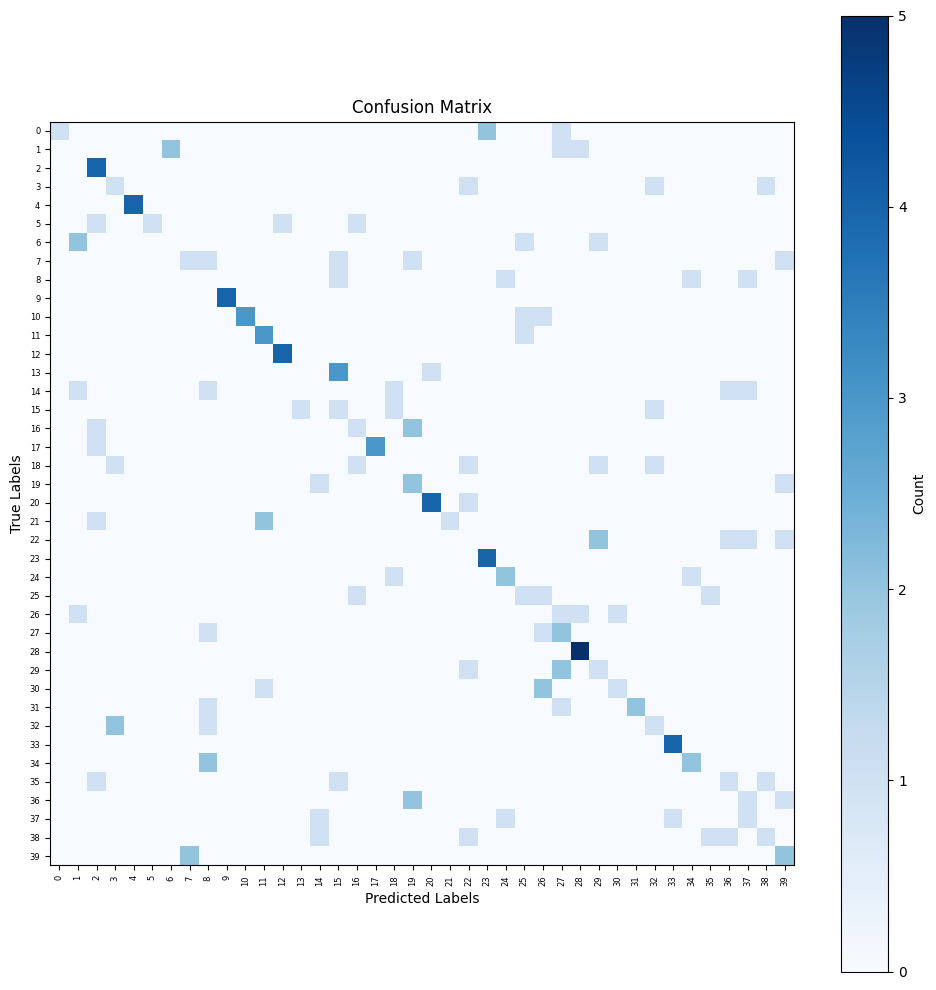

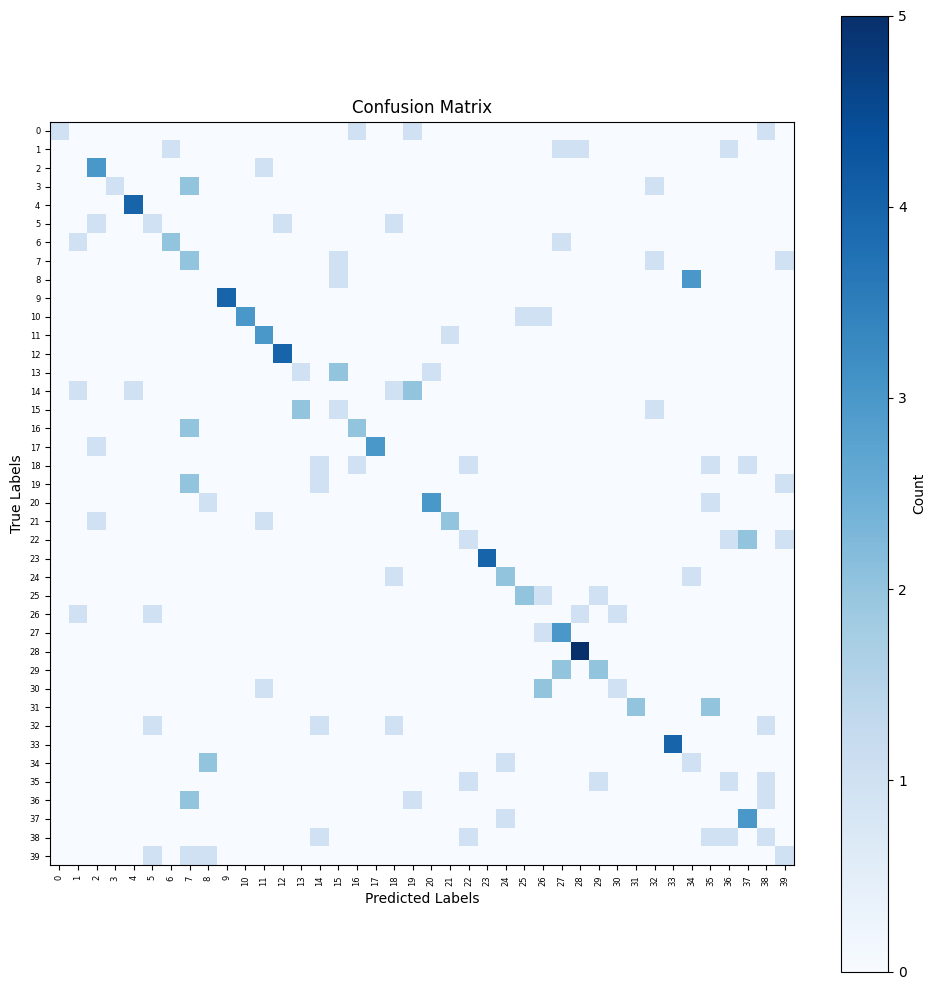

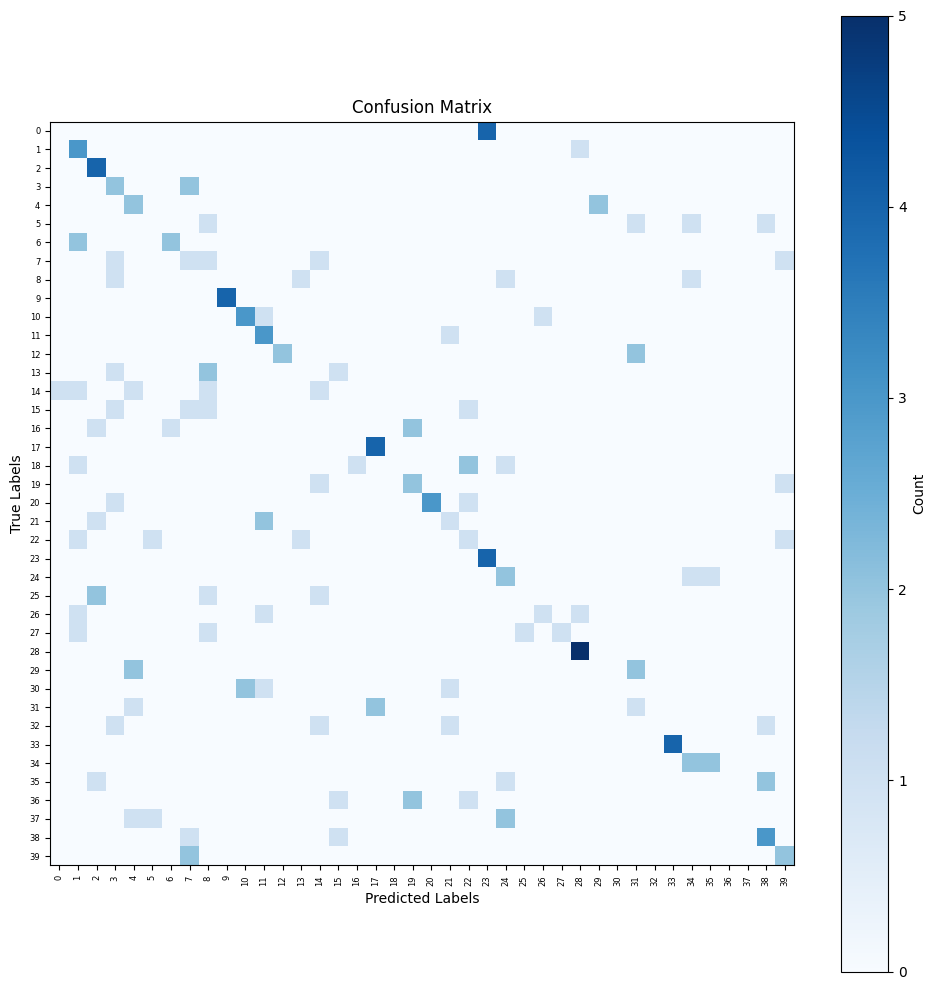

Learning rate set to 0.075436
0:	learn: 3.6424454	total: 204ms	remaining: 3m 24s
1:	learn: 3.5963805	total: 258ms	remaining: 2m 8s
2:	learn: 3.5462526	total: 310ms	remaining: 1m 42s
3:	learn: 3.4835521	total: 360ms	remaining: 1m 29s
4:	learn: 3.4242118	total: 410ms	remaining: 1m 21s
5:	learn: 3.3668434	total: 459ms	remaining: 1m 16s
6:	learn: 3.3073201	total: 509ms	remaining: 1m 12s
7:	learn: 3.2540036	total: 559ms	remaining: 1m 9s
8:	learn: 3.1962507	total: 610ms	remaining: 1m 7s
9:	learn: 3.1461456	total: 659ms	remaining: 1m 5s
10:	learn: 3.0996548	total: 708ms	remaining: 1m 3s
11:	learn: 3.0570533	total: 758ms	remaining: 1m 2s
12:	learn: 3.0082049	total: 807ms	remaining: 1m 1s
13:	learn: 2.9635701	total: 858ms	remaining: 1m
14:	learn: 2.9226593	total: 904ms	remaining: 59.3s
15:	learn: 2.8883521	total: 952ms	remaining: 58.5s
16:	learn: 2.8524372	total: 998ms	remaining: 57.7s
17:	learn: 2.8149129	total: 1.05s	remaining: 57.1s
18:	learn: 2.7761003	total: 1.09s	remaining: 56.5s
19:	lear

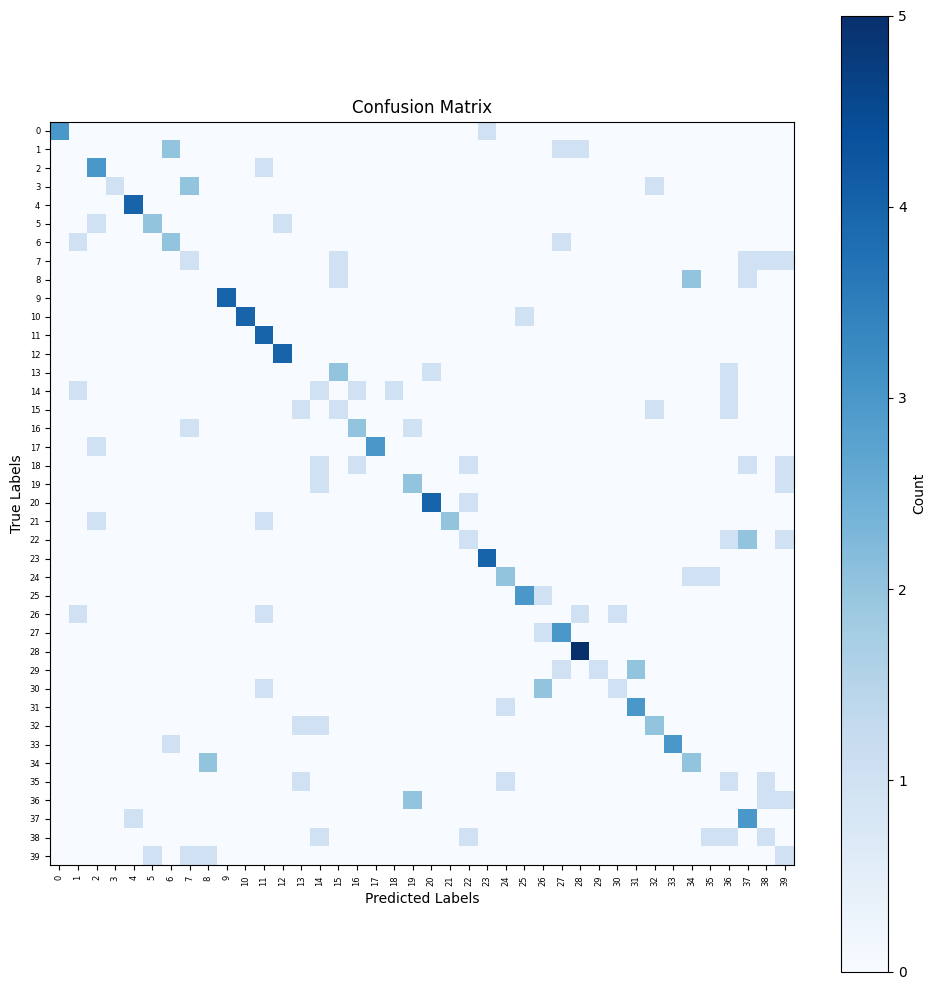

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 759
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 28
[LightGBM] [Info] Start training from score -3.668677
[LightGBM] [Info] Start training from score -3.668677
[LightGBM] [Info] Start training from score -3.668677
[LightGBM] [Info] Start training from score -3.668677
[LightGBM] [Info] Start training from score -3.668677
[LightGBM] [Info] Start training from score -3.668677
[LightGBM] [Info] Start training from score -3.668677
[LightGBM] [Info] Start training from score -3.774037
[LightGBM] [Info] Start training from score -3.668677
[LightGBM] [Info] Start training from score -3.668677
[LightGBM] [Info] Start training from score -3.774037
[LightGBM] [Info] Start training from score -3.668677
[L

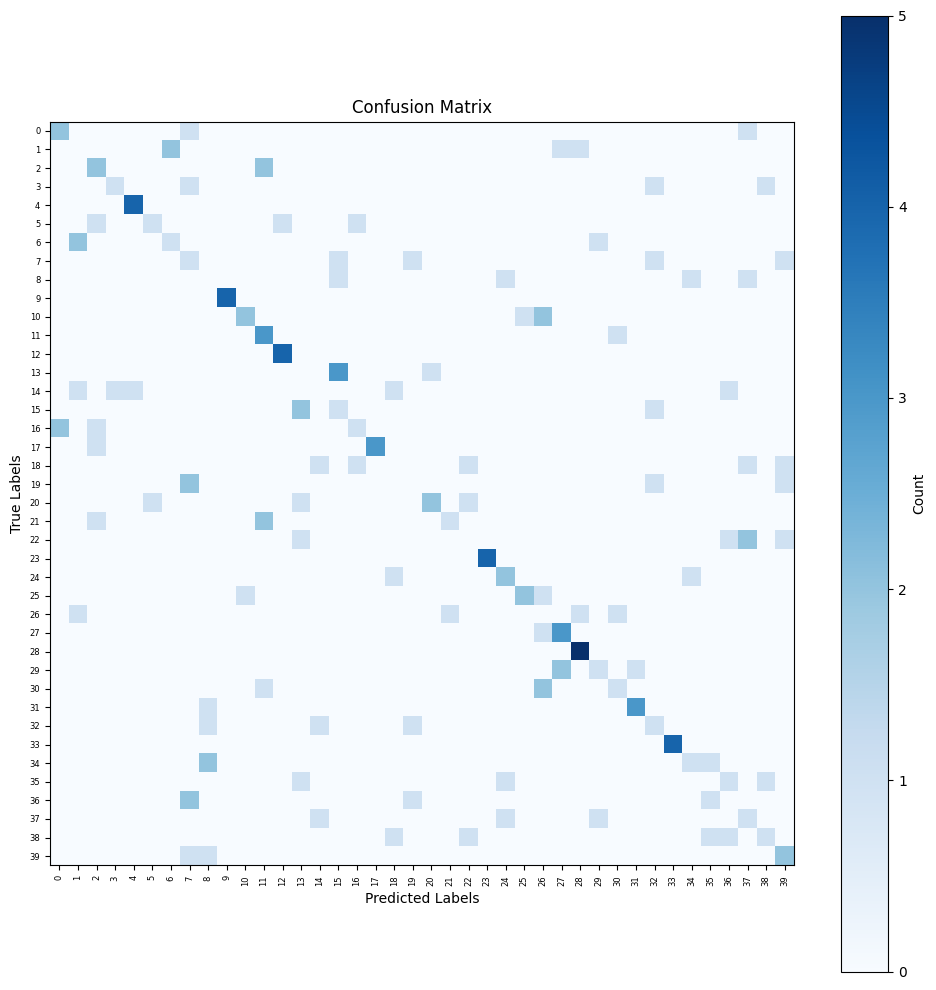

,Decision Tree,Random Forest,Gradient Boosting,HistGradientBoosting,KNN,CatBoost,LightGBM
Accuracy,0.380952,0.500000,0.398810,0.428571,0.375000,0.488095,0.380952
Precision,0.418537,0.496570,0.430933,0.467429,0.330707,0.503005,0.387876
Recall,0.380952,0.500000,0.398810,0.428571,0.375000,0.488095,0.380952
F1 Score,0.377821,0.482981,0.385183,0.425657,0.329079,0.472780,0.372573


In [17]:
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

results_data = pd.DataFrame(results)
results_data